# Linear Regression Model Creation and Optimization

The goal of this notebook is to implement an optimized linear regression model utilizing batch gradient descent to lower the Squared Error Cost
The focus is not data analysis but rather algorithm implementation into useful datasets

## Goals

- Implement a linear regression algorithm
- Create an optimization function for batch gradient descent




Importing Required Libraries

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math


In [8]:
dframe = pd.read_csv("startup_data.csv")

## First Step

The first goal is to implement a cost function to use to determine the squared error value

This will be the equation for the cost function
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 

- Choosing our 3 features
- Creating testing Sets


In [10]:
dframe

,Startup Name,Industry,Funding Rounds,Funding Amount (M USD),Valuation (M USD),Revenue (M USD),Employees,Market Share (%),Profitable,Year Founded,Region,Exit Status
0,Startup_1,IoT,1,101.09,844.75,67.87,1468,5.20,0,2006,Europe,Private
1,Startup_2,EdTech,1,247.62,3310.83,75.65,3280,8.10,1,2003,South America,Private
2,Startup_3,EdTech,1,109.24,1059.37,84.21,4933,2.61,1,1995,South America,Private
3,Startup_4,Gaming,5,10.75,101.90,47.08,1059,2.53,0,2003,South America,Private
4,Startup_5,IoT,4,249.28,850.11,50.25,1905,4.09,0,1997,Europe,Acquired
...,...,...,...,...,...,...,...,...,...,...,...,...
495,Startup_496,EdTech,2,181.86,2378.65,59.64,3331,0.58,1,1993,Europe,Private
496,Startup_497,AI,2,107.34,1394.58,10.22,2223,5.85,0,2019,South America,Private
497,Startup_498,E-Commerce,1,160.29,502.09,84.73,2222,4.32,0,2019,Australia,Private
498,Startup_499,Gaming,5,234.65,2814.52,53.16,4972,5.53,0,2011,Europe,Private


The three columns I will choose to analyze against revenue will be, Amount of Employees, Funding Amounts and Valuation
For this i will create 3 train-test splits


In [12]:
y = dframe["Revenue (M USD)"]

In [13]:
x_fun = dframe["Funding Amount (M USD)"]
x_val = dframe["Valuation (M USD)"]





In [14]:
x_funtrain, x_funtest, y_funtrain, y_funtest = train_test_split(x_fun,y, test_size = 0.3, random_state = 9)

x_valtrain, x_valtest, y_valtrain, y_valtest = train_test_split(x_val,y, test_size = 0.3, random_state = 9)





In [15]:




#converting to numpy array




x_funtrain = x_funtrain.to_numpy()
x_funtest = x_funtest.to_numpy()
y_funtrain = y_funtrain.to_numpy()
y_funtest = y_funtest.to_numpy()

x_valtrain = x_valtrain.to_numpy()
x_valtest = x_valtest.to_numpy()
y_valtrain = y_valtrain.to_numpy()
y_valtest = y_valtest.to_numpy()












In [16]:
type(x_funtrain)

numpy.ndarray

In [17]:
#Now creating the cost function


def cost_func(x, y, w, b):

    """

    Variable definitions
    m = amount of features
    curcost = Sum of cost of thhe features before total calculation

    """

    m = x.shape[0]
    curcost = 0

    for i in range(m):
        fwb = w*x[i] + b
        curcost = curcost + (fwb - y[i]) ** 2
    

    total_cost = 1/(2*m) * curcost
    return total_cost



### Second Step 
The next step is creating the function for the partial derivative of the squared error cost, this is to aid in the gradient descent function which is represented in this equation

$$\begin{align*} 
\text{}&\text{} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$


And the partial derivative for w and b respectively

$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \\
\end{align}
$$


In [19]:

def partial_descent(x, y, w, b):

    """
    Variable definitions
    
    m = the amount of features
    
    dw_jw = Partial derivative for the function with w
    dw_jb = Partial derivative for the function with b

    """
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        
        fwb = (w * x[i]) + b
        
        
        dj_dw_cur = (fwb - y[i]) * x[i]
        dj_db_cur = (fwb - y[i])
        
        dj_dw += dj_dw_cur
        dj_db += dj_db_cur

        dj_jw =  dj_dw / m
        dj_jb =  dj_db / m

    return dj_dw, dj_db
    

### Third Step
The last step to creating the algorithm is to create the gradient descent function itself while also providing functionality to review the changes in cost through each iteration.



In [41]:
def gradient_descent(x, y, w_initial, b_initial, alpha, iterations, cost_func, partial_descent):
    
        
    cost_prev = []
    prev_wb = []

    w = w_initial
    b = b_initial
   
    for i in range(iterations):
        dw_jw, dw_jb = partial_descent(x, y, w, b)
    
        w = w - alpha * dw_jw
        b = b - alpha * dw_jb


        if i < 200000:
            cost_prev.append(cost_func(x, y, w, b))
            prev_wb.append([w,b])

    return w, b, cost_prev, prev_wb

### Final steps

The final part is to actually plot the best gradient descent provided by the function and to display the cost at each iteration on a graph to analyze how it changes with gradient descent



In [44]:
# Lets set initial values for w and b = 0

w_start = 0
b_start = 0

iterations = 170000
             
alpha = 1.0e-7

# First we'll train with the amount of funding that the start up recieved as the x, with revenue as our y
fun_w, fun_b, fun_cost_prev, fun_prev_wb = gradient_descent(x_funtrain, y_funtrain, w_start, b_start, alpha, iterations, cost_func, partial_descent)

print(fun_w, fun_b)

0.06789603610037456 35.807862063704


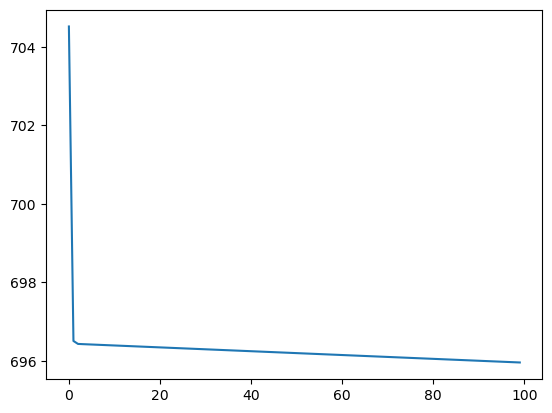

In [45]:
it100 = [x for x in range (100)]
plt.plot (it100, fun_cost_prev[:100])





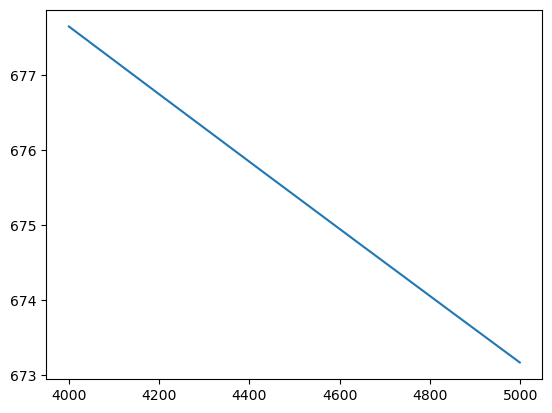

In [46]:
it5000 = [x for x in range (4000, 5000)]

plt.plot(it5000, fun_cost_prev[4000:5000])

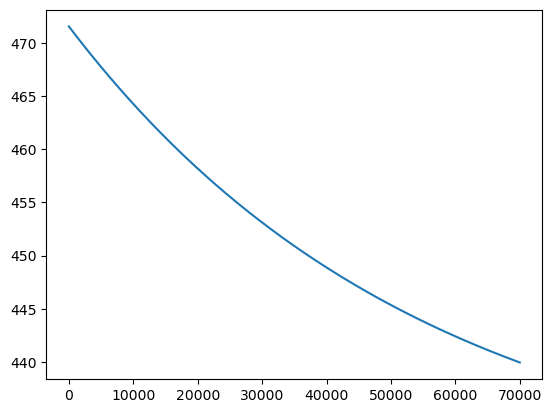

In [47]:
it5000 = [x for x in range (70000)]

plt.plot(it5000, fun_cost_prev[100000:])

### Analysis

From these 3 graphs we can see that the cost is optimized over time, only neededing more iterations to find an appropriate value.
If we normalize the data we can find a value for gradient descent that is appropriate for use, which will be the next part




In [58]:
x_funmean = x_funtrain.mean()
x_funstd = x_funtrain.std()
y_funmean = y_funtrain.mean()
y_funstd = y_funtrain.std()

x_valmean = x_valtrain.mean()
x_valstd = x_valtrain.std()
y_valmean = y_valtrain.mean()
y_valstd = y_valtrain.std()

x_funtrain_nm = (x_funtrain - x_funmean) / x_funstd
x_funtest_nm = (x_funtest - x_funmean) / x_funstd
y_funtrain_nm = (y_funtrain - y_funmean) / y_funstd
y_funtest_nm = (y_funtest - y_funmean) / y_funstd

x_valtrain_nm = (x_valtrain - x_valmean) / x_valstd
x_valtest_nm = (x_valtest - x_valmean) / x_valstd
y_valtrain_nm =(y_valtrain - y_valmean) / y_valstd
y_valtest_nm = (y_valtest - y_valmean) / y_valstd


In [75]:
# Lets set initial values for w and b = 0

w_start = 0
b_start = 0

iterationsmin = 12000
alphamin = 5.0e-3

# First we'll train with the amount of funding that the start up recieved as the x, with revenue as our y
fun_min_w, fun_min_b, fun_min_cost_prev, funmin_prev_wb = gradient_descent(x_funtrain_nm, y_funtrain_nm, w_start, b_start, alphamin, iterationsmin, cost_func, partial_descent)

print(fun_min_w, fun_min_b)

0.06235461293480753 1.3967993428567358e-16


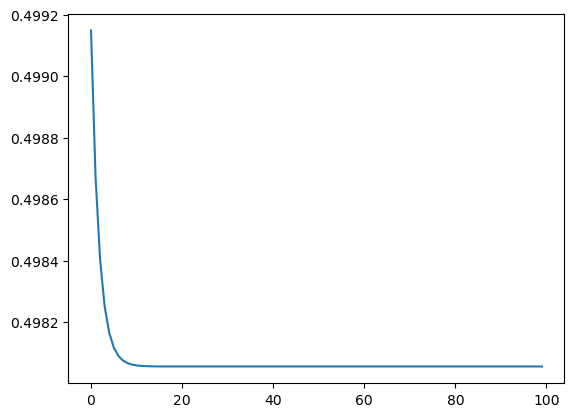

In [76]:
itmin100 = [x for x in range (100)]
plt.plot (itmin100, fun_min_cost_prev[:100])




________________________________________________________________________________________________________________
The graph below shows that our cost function has been minimized and will not go any further for this normalized data
Thus with this gradient descent algorithm, a minimum value as been found and can be used, so we can assume that for the non minimized data that
the algorithm can do the same with it

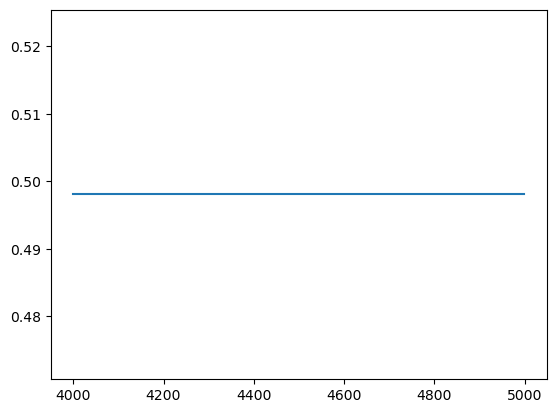

In [79]:
itmin5000 = [x for x in range (4000, 5000)]

plt.plot(itmin5000, fun_min_cost_prev[4000:5000])

### Graphing prediction values and the actual test values

From these graphs we can determine that while we can use it to make some kind of prediction, the other features/columns present in the data set also have a significant effect on the revenue of the start up and just analyzing the funding it recieved isn't enough.

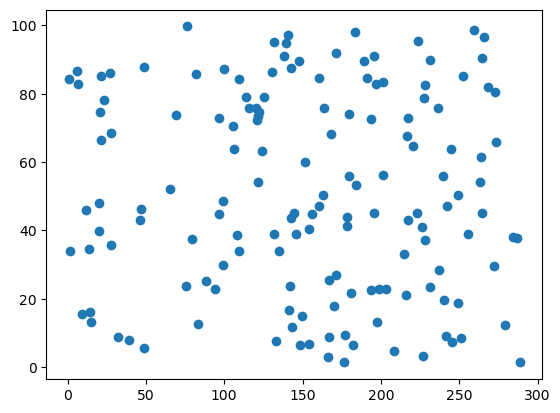

In [49]:
fun_pred = []


for i in range (x_funtest.shape[0]):
    fun_pred.append( x_funtest[i] * fun_w + fun_b)


plt.scatter(x_funtest, y_funtest)

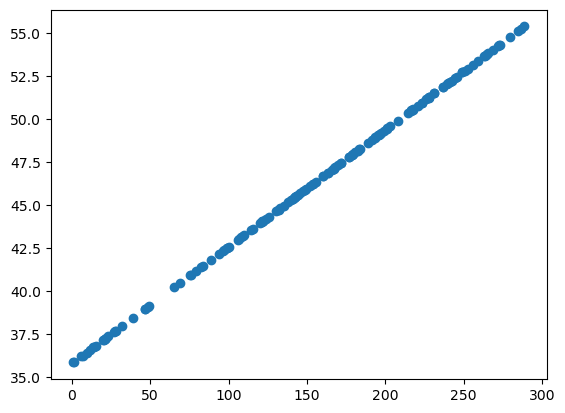

In [50]:
plt.scatter(x_funtest, fun_pred)

### END OF NOTEBOOK

This notebook was created to aid in my understandingof linear regression and gradient descent algorithms, as well as understanding the inner workings of a linear regression algorithm. This serves as a record for my progress in Machine learning and Data analysis